<a href="https://colab.research.google.com/github/tcmetzger/Extract-Apple-Covid-mobility-data/blob/master/apple_map_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and plot data from Apple Mobility Trends
Source and information: https://www.apple.com/covid19/mobility

##Read and format data from apple-file

General imports:

In [0]:
import datetime
import pytz
import pandas as pd
import matplotlib.pyplot as plt

Generate url based on current date:

In [2]:
now = datetime.datetime.now(pytz.timezone('US/Pacific'))
date = now - datetime.timedelta(days=2)
url = f'https://covid19-static.cdn-apple.com/covid19-mobility-data/2005HotfixDev13/v1/en-us/applemobilitytrends-{date.strftime("%Y-%m-%d")}.csv'

# url = '/content/drive/My Drive/Colab Notebooks/applemobilitytrends-2020-04-13.csv' # Alternatively: use downloaded file

url

'https://covid19-static.cdn-apple.com/covid19-mobility-data/2005HotfixDev13/v1/en-us/applemobilitytrends-2020-04-13.csv'

Download raw data and create DataFrame:

1.   List item
2.   List item



In [4]:
df = pd.read_csv(url, index_col=['geo_type', 'region', 'transportation_type']) # Create MultiIndex
df = df.transpose()
df.index = pd.to_datetime(df.index) # Parse dates
df.head(3)

geo_type            country/region                    ...    city                
region                     Albania         Argentina  ...  Zurich                
transportation_type        driving walking   driving  ... driving transit walking
2020-01-13                  100.00  100.00    100.00  ...  100.00  100.00  100.00
2020-01-14                   95.30  100.68     97.07  ...  102.38  101.51  106.27
2020-01-15                  101.43   98.93    102.45  ...  110.84  108.93  116.73

[3 rows x 395 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2020-01-13 to 2020-04-13
Columns: 395 entries, ('country/region', 'Albania', 'driving') to ('city', 'Zurich', 'walking')
dtypes: float64(395)
memory usage: 284.6 KB


## Extract city data

Set up variables:

In [0]:
geo_type = 'city'
regions =['Bochum - Dortmund', 'Cologne', 'Dusseldorf']
transportation_type = 'driving' # Alternative values: 'walking', 'transit'
start_date = '2020-01-13' # Option to set later start date

Create dict for German translations:

In [0]:
translations = {
    'Bochum - Dortmund' : 'Bochum/Dortmund', 
    'Cologne' : 'Köln',
    'Dusseldorf' : 'Düsseldorf',
}

Generate DataFrame for graph:

In [8]:
mask = df.index >= start_date
cities_df = pd.DataFrame()
for region in regions:
    cities_df[translations[region]] = df[(geo_type, region, transportation_type)][mask]

cities_df['Deutschland insges.'] = df[('country/region', 'Germany', transportation_type)][mask]

cities_df.head()

,Bochum/Dortmund,Köln,Düsseldorf,Deutschland insges.
2020-01-13,100.00,100.00,100.00,100.00
2020-01-14,100.72,94.81,104.58,101.31
2020-01-15,105.40,95.04,103.00,102.82
2020-01-16,100.43,97.11,103.91,104.61
2020-01-17,111.27,107.21,114.26,114.38


## Plot city data

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


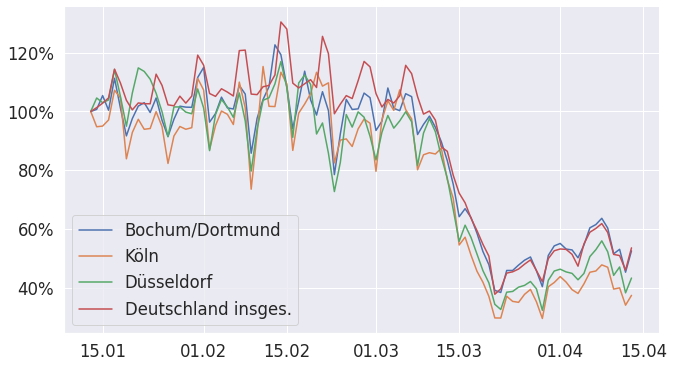

In [9]:
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter

sns.set(style="darkgrid", rc={'figure.figsize':(10.66, 6)})
sns.set_context("notebook", font_scale=1.5)
#plt.xticks(rotation=45, horizontalalignment='right')

chart = sns.lineplot(data=cities_df, dashes=False)
chart.xaxis.set_major_formatter(DateFormatter('%d.%m')) # Format x axis (dates)
chart.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y/100))) # Format y axis (percentages)
sns.despine()